# <span style="color:navy"> Exercice 4 - Molecular Dynamics in microcanonical NVE</span>

The purpose of these exercises is to improve a given code for Molecular Dynamics in a microcanonical NVE ensemble. The code initially simulates the motion of interacting particles in a Lennard-Jones potential using the Verlet algorithm and then evaluates the thermodynamic properties of the system.

#### Dynamics

The simulation starts with the fcc crystal configuration, ensuring no overlap among particle positions. The time evolution of the system is computed using the Verlet algorithm as follows:

$\vec{r}(t+dt)=2\vec{r}(t)-\vec{r}(t-dt)+\frac{\vec{F(t)}}{m}dt^{2} $

This is a "two-step method," requiring both the current and previous positions. Forces between particles are derived from the energy potential ($\vec F=-\vec \nabla V$).
Thermodynamic properties

#### Potential energy 
The Lennard-Jones potential between two particles is:

$V_{ij}=4\epsilon [(\frac{\sigma}{|\vec{r_{i}}-\vec{r_{j}}|})^{12}-(\frac{\sigma}{|\vec{r_{i}}-\vec{r_{j}}|})^{6}] $

A spherical cutoff $r_c$ is applied to reduce calculations. As neighboring particles contribute most significantly, interactions beyond $r_c$ are neglected.

#### Kinetic energy 
Computed as $K_i=\frac{1}{2}m(v_x^2+v_y^2+v_z^2)$, with velocities derived from the Verlet algorithm.

#### Total energy 
The sum of potential and kinetic energy: $E=V+K$.

#### Temperature 
Derived from kinetic energy using the energy equipartition principle: $T = 2K_{tot}/(3N)$.

#### Pressure 
Estimated via the virial theorem:

$P=\rho k_{b}T+\frac{\langle W \rangle}{3V} $

where:

$W= \sum_{i}^{N-1} \sum_{j>i}^{N} 48\epsilon[(\frac{\sigma}{|\vec{r_{i}}-\vec{r_{j}}|})^{12}-\frac{1}{2}(\frac{\sigma}{|\vec{r_{i}}-\vec{r_{j}}|})^{6}] $

#### Periodic Boundary Conditions

To mimic an infinite system, we use a characteristic 3D box replicated infinitely. This ensures a constant density and periodicity as particles leaving one box re-enter through its opposite side.

## 4.1 - Implementation of Pressure

This exercise focuses on implementing the pressure formula previously shown.

## 4.2 - MD simulation via Lennard-Jones model of Argon

In this exercise first we need to evaluate mean values and uncertainties of thermodynamic properties using the data blocking method to reduce correlations and apply the Central Limit Theorem. 

At last we are required to simulate Argon in three phases:

Solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$, $r_c = 2.2$

Liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$, $r_c = 2.5$

Gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$, $r_c = 5.0$

Results are printed in SI units using rescaling rules. Input files manage parameters for each phase and Argon-specific properties. Output files for each phase are saved with specific names.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Solid phase


From the graph below we can deduce that for the solid phase the system needs around 300 steps starting from an initial temperature $T=1.54$

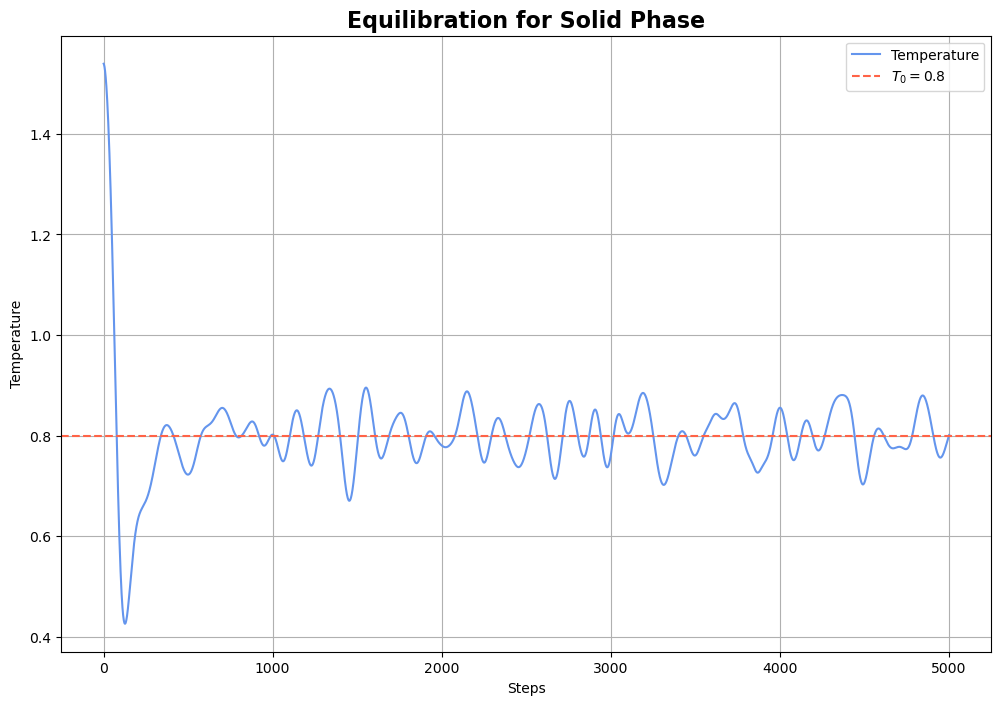

In [3]:
T0solid = 0.8
n, a = np.loadtxt("temperature_test_solid.dat", usecols=(0,1), unpack=True)

plt.figure(figsize=(12, 8))
plt.plot(n, a, label='Temperature', color='Cornflowerblue')
plt.axhline(y=T0solid, color='tomato', linestyle='--', label='$T_0 = 0.8$')

plt.xlabel('Steps')
plt.ylabel('Temperature')
plt.grid(True)
plt.title('Equilibration for Solid Phase', fontsize=16, fontweight='bold')

plt.legend()
plt.show()

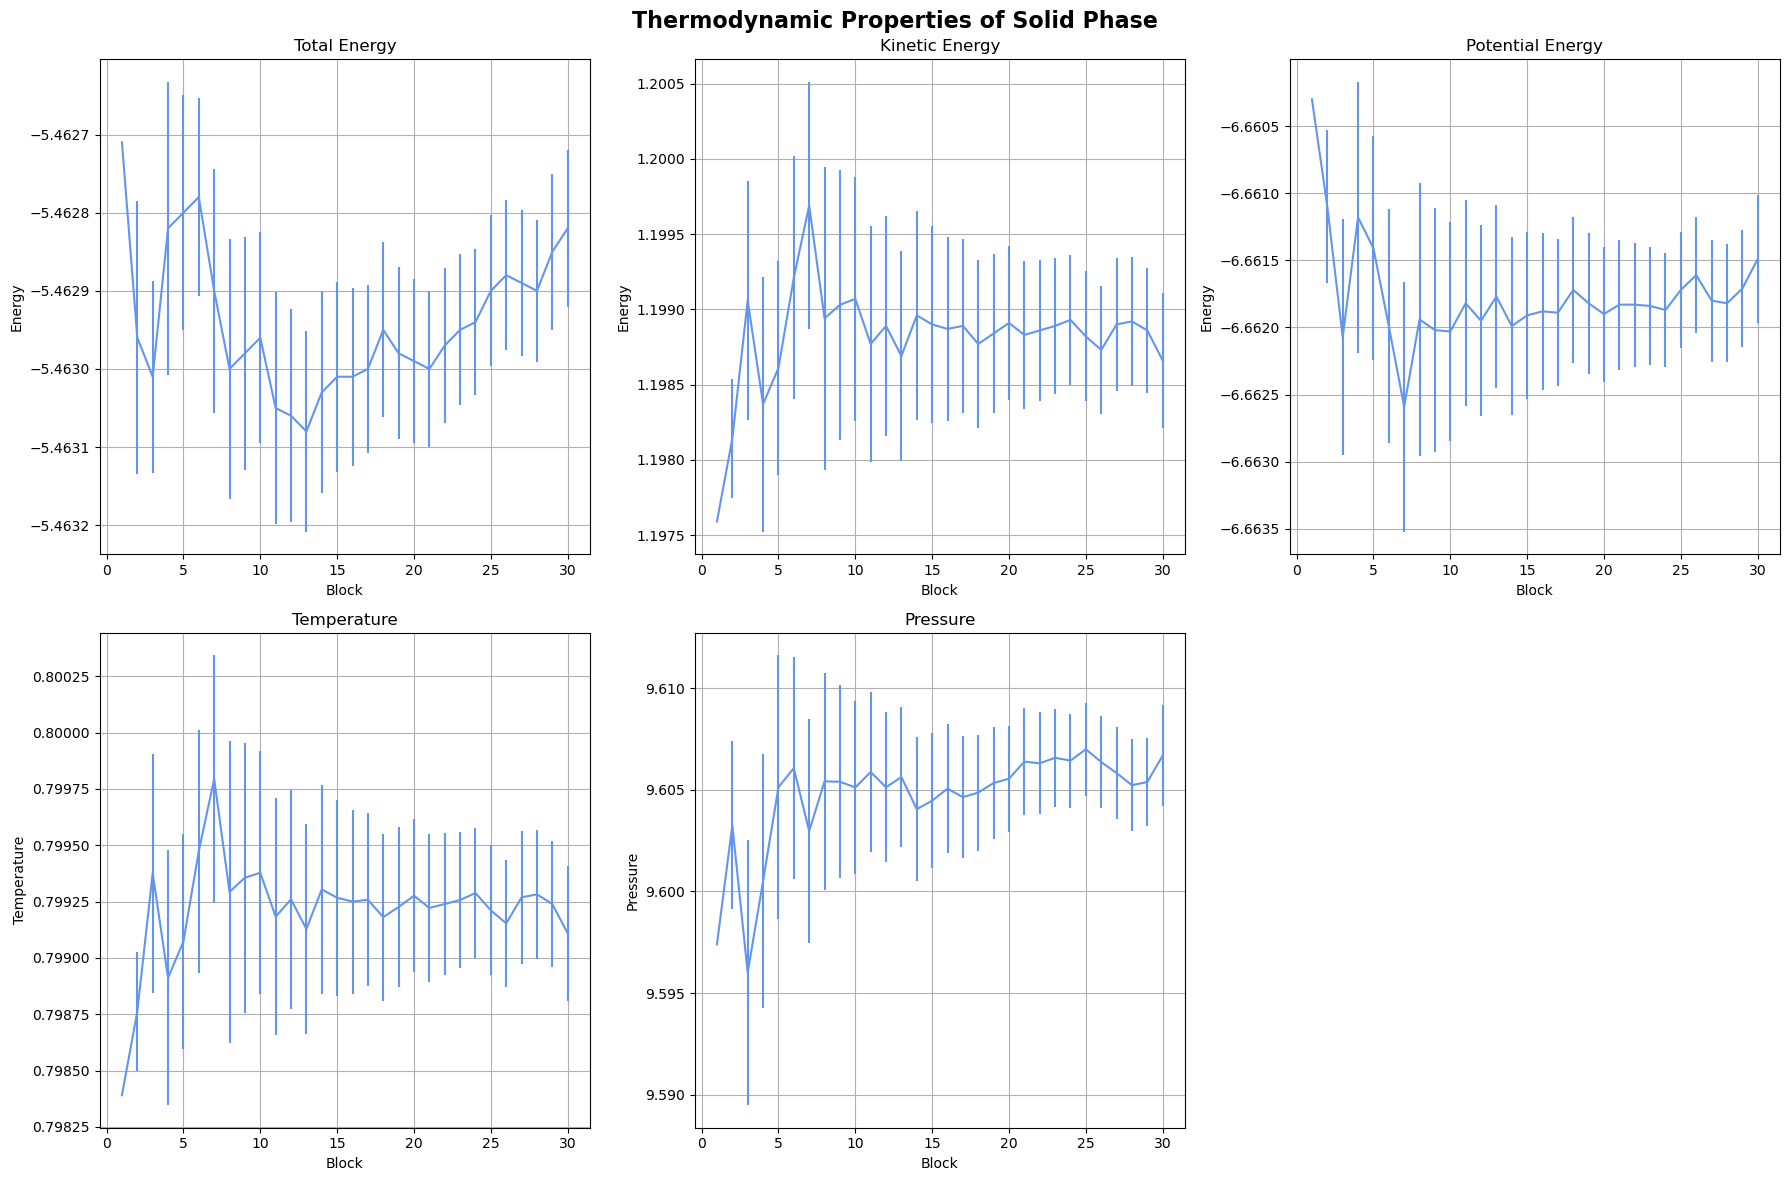

In [14]:
n, E, err_E = np.loadtxt("total_energy_solid.dat", usecols=(0,2,3), unpack=True)
n, K, err_K = np.loadtxt("kinetic_energy_solid.dat", usecols=(0,2,3), unpack=True)
n, P, err_P = np.loadtxt("potential_energy_solid.dat", usecols=(0,2,3), unpack=True)
n, T, err_T = np.loadtxt("temperature_solid.dat", usecols=(0,2,3), unpack=True) 
n, p, err_p = np.loadtxt("pressure_solid.dat", usecols=(0,2,3), unpack=True)

figure, axis = plt.subplots(2, 3, figsize=(18, 12))
figure.suptitle("Thermodynamic Properties of Solid Phase", fontsize=16, fontweight='bold')

axis[1,2].axis('off')

plots = [
    (axis[0,0], E, err_E, "Total Energy", "Energy"),
    (axis[0,1], K, err_K, "Kinetic Energy", "Energy"),
    (axis[0,2], P, err_P, "Potential Energy", "Energy"),
    (axis[1,0], T, err_T, "Temperature", "Temperature"),
    (axis[1,1], p, err_p, "Pressure", "Pressure")
]

for ax, data, err, title, ylabel in plots:
    ax.errorbar(n, data, yerr=err, color='Cornflowerblue')
    ax.set_title(title)
    ax.set_xlabel("Block")
    ax.set_ylabel(ylabel)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Liquid phase


From the graph below we can deduce that for the liquid phase the system needs around 300 steps starting from an initial temperature $T=1.99$

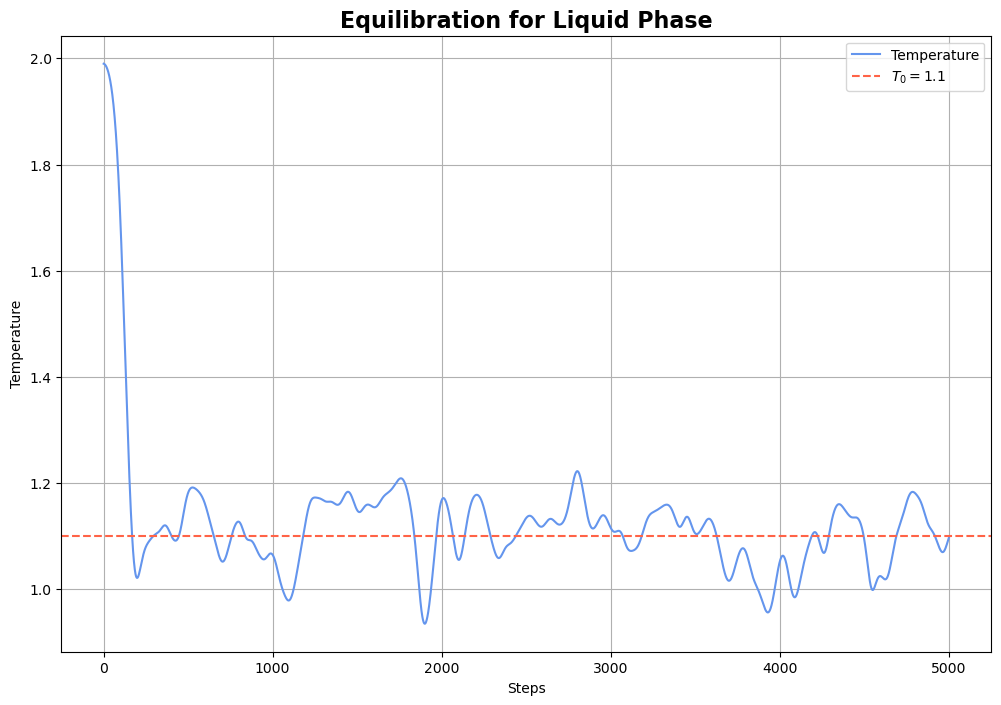

In [5]:
T0liquid = 1.1
n, a = np.loadtxt("temperature_test_liquid.dat", usecols=(0,1), unpack=True)

plt.figure(figsize=(12, 8))
plt.plot(n, a, label='Temperature', color='Cornflowerblue')
plt.axhline(y=T0liquid, color='tomato', linestyle='--', label='$T_0 = 1.1$')
#plt.xlim(0,2000) uncomment to see more precisely how many step we need

plt.xlabel('Steps')
plt.ylabel('Temperature')
plt.grid(True)
plt.title('Equilibration for Liquid Phase', fontsize=16, fontweight='bold')

plt.legend()
plt.show()

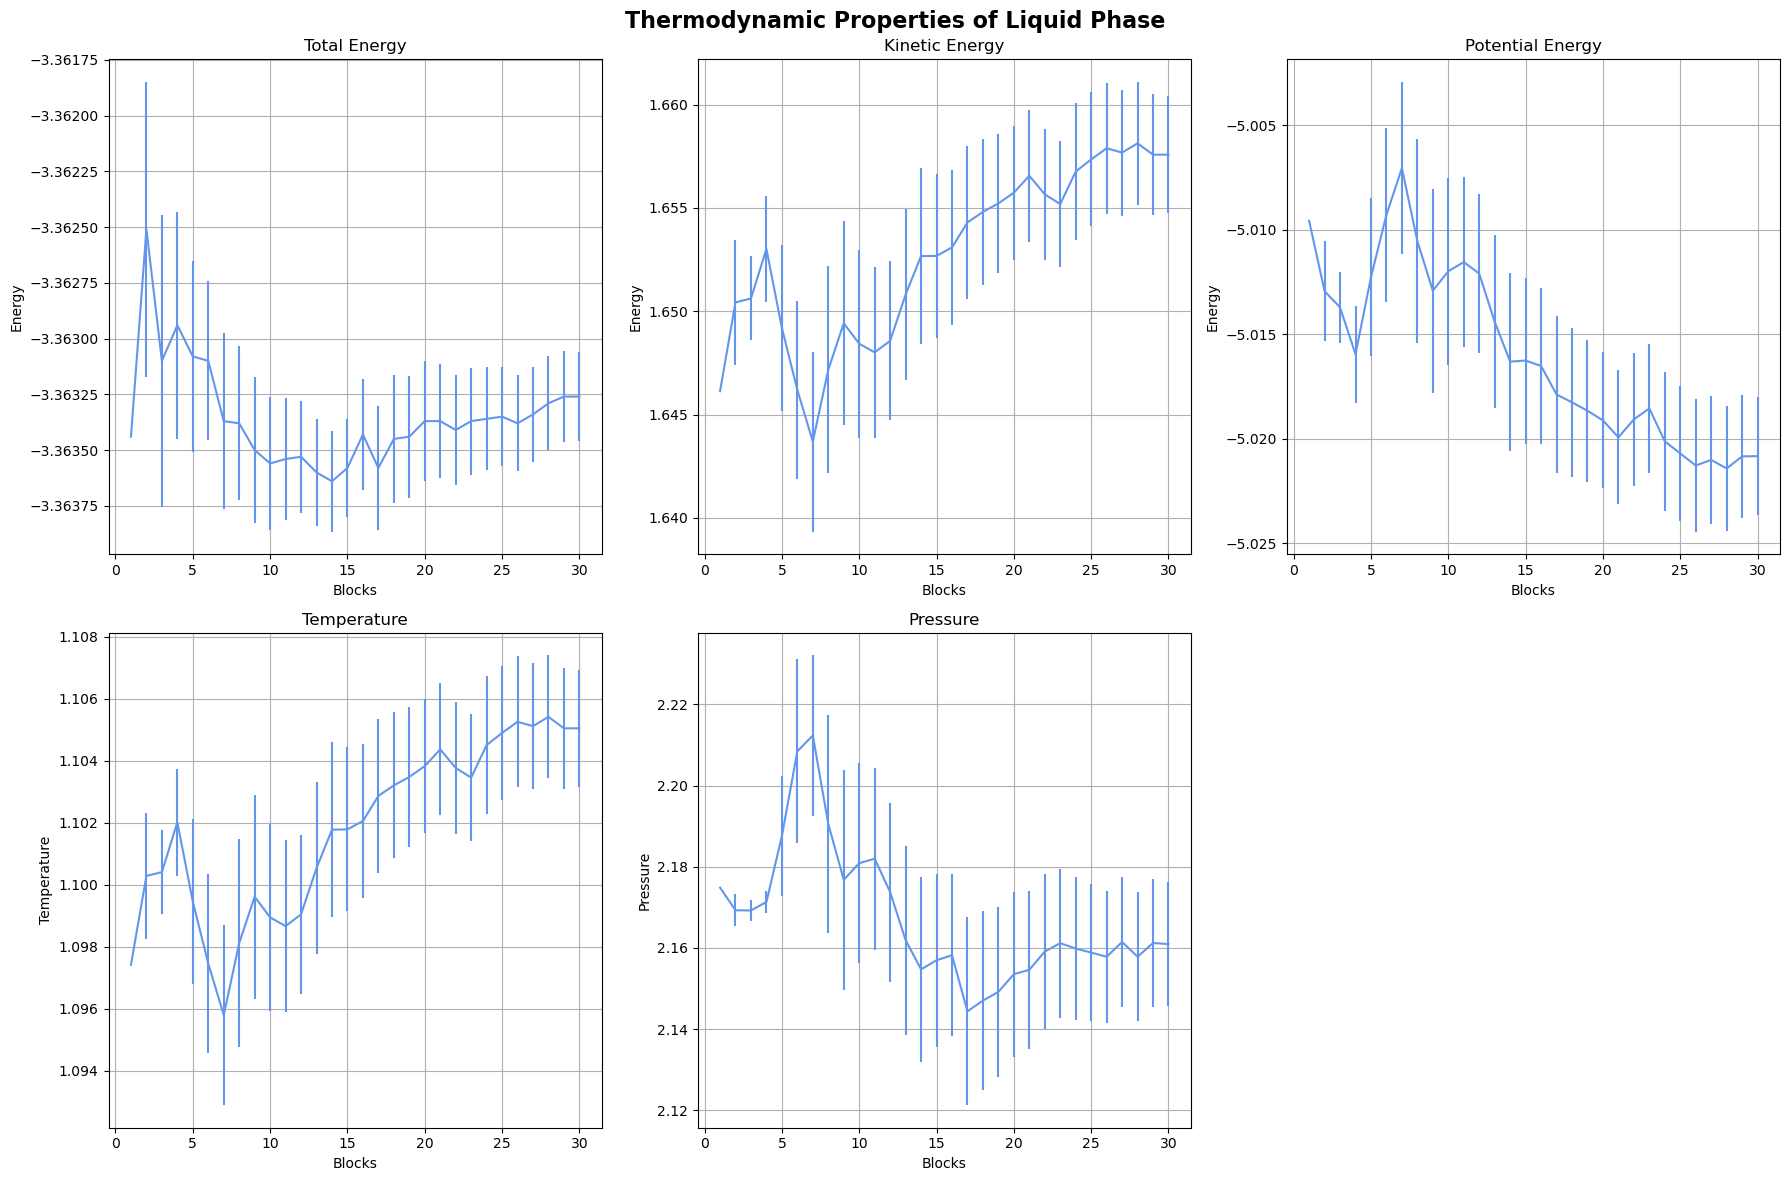

In [6]:
n, E, err_E = np.loadtxt("total_energy_liquid.dat", usecols=(0,2,3), unpack=True)
n, K, err_K = np.loadtxt("kinetic_energy_liquid.dat", usecols=(0,2,3), unpack=True)
n, P, err_P = np.loadtxt("potential_energy_liquid.dat", usecols=(0,2,3), unpack=True)
n, T, err_T = np.loadtxt("temperature_liquid.dat", usecols=(0,2,3), unpack=True) 
n, p, err_p = np.loadtxt("pressure_liquid.dat", usecols=(0,2,3), unpack=True)

figure, axis = plt.subplots(2, 3, figsize=(18, 12))
figure.suptitle("Thermodynamic Properties of Liquid Phase", fontsize=16, fontweight='bold')

axis[1,2].axis('off')

plots = [
    (axis[0,0], E, err_E, "Total Energy", "Energy"),
    (axis[0,1], K, err_K, "Kinetic Energy", "Energy"),
    (axis[0,2], P, err_P, "Potential Energy", "Energy"),
    (axis[1,0], T, err_T, "Temperature", "Temperature"),
    (axis[1,1], p, err_p, "Pressure", "Pressure")
]

for ax, data, err, title, ylabel in plots:
    ax.errorbar(n, data, yerr=err, color='Cornflowerblue')
    ax.set_title(title)
    ax.set_xlabel("Blocks")
    ax.set_ylabel(ylabel)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Gas phase 

From the graph below we can deduce that for the gas phase we were able to reach a temperature $T=1.15$ in 5000 steps.

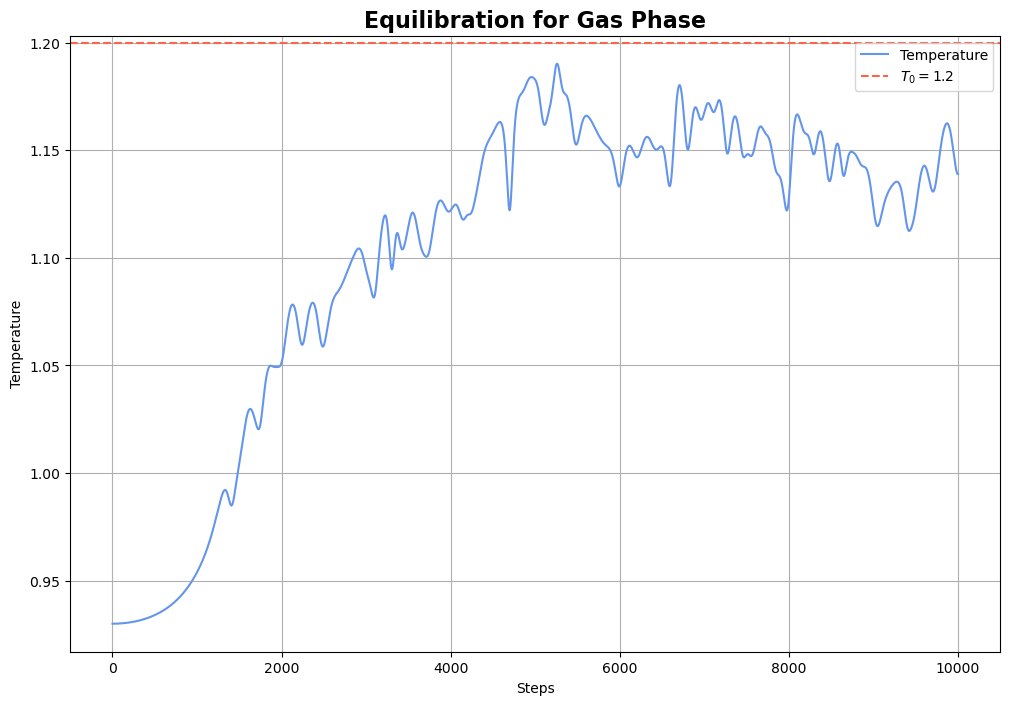

In [7]:
T0gas = 1.2
n, a = np.loadtxt("temperature_test_gas.dat", usecols=(0,1), unpack=True)

plt.figure(figsize=(12, 8))
plt.plot(n, a, label='Temperature', color='Cornflowerblue')
plt.axhline(y=T0gas, color='tomato', linestyle='--', label='$T_0 = 1.2$')
#plt.xlim(0,10000) uncomment to see more precisely how many step we need

plt.xlabel('Steps')
plt.ylabel('Temperature')
plt.grid(True)
plt.title('Equilibration for Gas Phase', fontsize=16, fontweight='bold')

plt.legend()
plt.show()

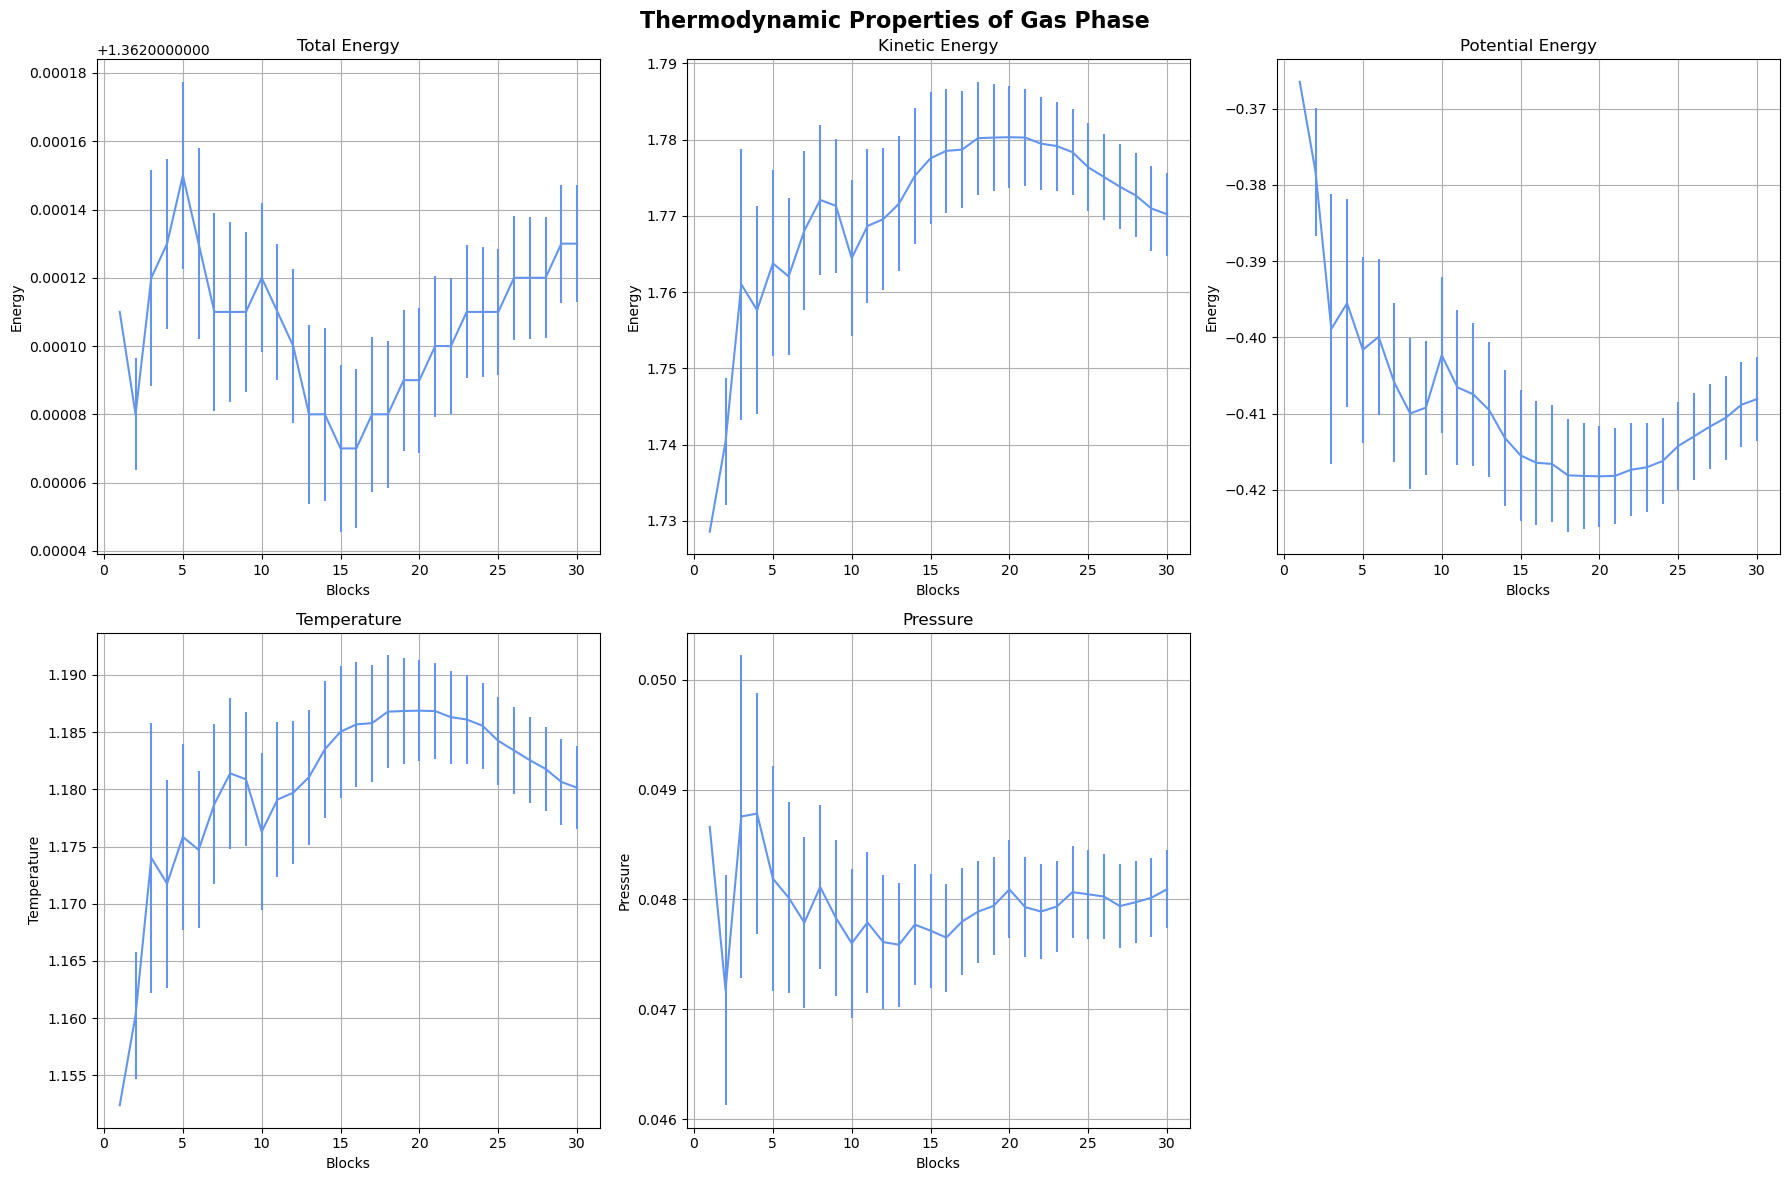

In [8]:
n, E, err_E = np.loadtxt("total_energy_gas.dat", usecols=(0,2,3), unpack=True)
n, K, err_K = np.loadtxt("kinetic_energy_gas.dat", usecols=(0,2,3), unpack=True)
n, P, err_P = np.loadtxt("potential_energy_gas.dat", usecols=(0,2,3), unpack=True)
n, T, err_T = np.loadtxt("temperature_gas.dat", usecols=(0,2,3), unpack=True) 
n, p, err_p = np.loadtxt("pressure_gas.dat", usecols=(0,2,3), unpack=True)

figure, axis = plt.subplots(2, 3, figsize=(18, 12))
figure.suptitle("Thermodynamic Properties of Gas Phase", fontsize=16, fontweight='bold')

axis[1,2].axis('off')

plots = [
    (axis[0,0], E, err_E, "Total Energy", "Energy"),
    (axis[0,1], K, err_K, "Kinetic Energy", "Energy"),
    (axis[0,2], P, err_P, "Potential Energy", "Energy"),
    (axis[1,0], T, err_T, "Temperature", "Temperature"),
    (axis[1,1], p, err_p, "Pressure", "Pressure")
]

for ax, data, err, title, ylabel in plots:
    ax.errorbar(n, data, yerr=err, color='Cornflowerblue')
    ax.set_title(title)
    ax.set_xlabel("Blocks")
    ax.set_ylabel(ylabel)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Observations:

Solid phase exhibits a stable trend.

Liquid phase is less regular.

Gas phase shows high irregularity.

These behaviors align with expectations based on particle motion freedom in different phases.